In [323]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [324]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(
    Path('/Users/candacestingley/Documents/Bootcamp_Folder/Project_4/csv/heart_2.csv')   
)

# Review the DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [325]:
#Class is balanced

In [326]:
count_no_sub = len(df[df['HeartDisease']==0])
count_sub = len(df[df['HeartDisease']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage w/ no Heart Disease is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage w/ Heart Disease", pct_of_sub*100)

percentage w/ no Heart Disease is 44.66230936819172
percentage w/ Heart Disease 55.33769063180828


In [327]:
#f.groupby('HeartDisease').mean()

In [328]:
#df.groupby('ChestPainType').mean()

### 2. Separate the features `X` from the target `y`

In [329]:
# Seperate the features, X,  from the target variable y, ="HeartDisease"
y = df['HeartDisease']
X = df.drop(columns='HeartDisease')

In [330]:
# Preview the features data
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [331]:
# Preview the first five entries for the target variable
y[:5]

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

### 3. Encode the categorical variables from the features data using `get_dummies`.

In [332]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [333]:
# Review the features data
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [334]:
feature_names = X.columns.tolist()

### 4. Separate the data into training and testing subsets.

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 5. Scale the data using `StandardScaler`

In [336]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

### 6. Instantiate an K Nearest Neighbor Classifier instance.

In [337]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 5 
knn = KNeighborsClassifier(n_neighbors=5)

### 7. Fit and evaluate the model using the training data.

In [338]:
# Fit the model on the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### 8. Make predictions using the testing data.

In [339]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

### 9. Generate the classification report for the test data.

In [340]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        89
           1       0.92      0.87      0.89       141

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230



In [341]:
#Using Cross Validation to Get the Best Value of k
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score =  cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

In [342]:
pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


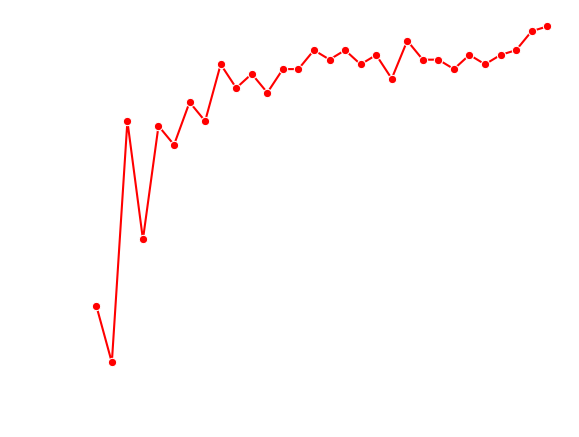

In [343]:
#plot the results
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", rc = {"axes.facecolor":"none", # specifics added for aesthetic purposes
                                "text.color":"white", 
                                "grid.color":"white", 
                                "axes.labelcolor":"white",
                                "xtick.color":"white",
                                "ytick.color":"white"})
sns.lineplot(x = k_values, y = scores, color = 'red', marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.savefig('model_2_chart.png', transparent = True)
plt.show()

In [344]:
from sklearn.metrics import accuracy_score

In [345]:
# Create and train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [346]:
# Calculate the accuracy on the test set
baseline_accuracy = accuracy_score(y_test, knn_model.predict(X_test_scaled))

In [347]:
# Calculate permutation feature importance
num_permutations = 100  # Number of shuffles
feature_importance = []

In [348]:
for feature_idx in range(X_test_scaled.shape[1]):
    X_test_permuted = X_test_scaled.copy()
    np.random.shuffle(X_test_permuted[:, feature_idx])  # Shuffle the values of the feature
    permuted_accuracy = accuracy_score(y_test, knn_model.predict(X_test_permuted))
    feature_importance.append((feature_idx, baseline_accuracy - permuted_accuracy))


In [349]:
# Sort feature importance based on the drop in accuracy
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)


In [350]:
# Print and visualize feature importance
for feature_idx, importance in feature_importance:
    print(f"Feature {feature_idx}: Importance = {importance:.4f}")


Feature 18: Importance = 0.0304
Feature 19: Importance = 0.0304
Feature 17: Importance = 0.0174
Feature 2: Importance = 0.0130
Feature 9: Importance = 0.0130
Feature 15: Importance = 0.0130
Feature 11: Importance = 0.0087
Feature 13: Importance = 0.0087
Feature 3: Importance = 0.0043
Feature 5: Importance = 0.0043
Feature 8: Importance = 0.0043
Feature 12: Importance = 0.0043
Feature 1: Importance = 0.0000
Feature 4: Importance = 0.0000
Feature 6: Importance = 0.0000
Feature 7: Importance = 0.0000
Feature 10: Importance = 0.0000
Feature 14: Importance = -0.0043
Feature 0: Importance = -0.0087
Feature 16: Importance = -0.0174


In [351]:
# Split features and importances into positive and negative lists
positive_features = []
positive_importances = []
negative_features = []
negative_importances = []

for feature, importance in feature_importance:
    if importance >= 0:
        positive_features.append(feature)
        positive_importances.append(importance)
    else:
        negative_features.append(feature)
        negative_importances.append(importance)

In [352]:
# Set Matplotlib parameters for white elements
plt.rcParams.update({
    "figure.facecolor": "none",
    "text.color": "white",
    "grid.color": "white",
    "axes.facecolor": "none",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white"
})

([<matplotlib.axis.YTick at 0x16e0aa1d0>,
 [Text(0, 0, 'Age'),
  Text(0, 1, 'RestingBP'),
  Text(0, 2, 'Cholesterol'),
  Text(0, 3, 'FastingBS'),
  Text(0, 4, 'MaxHR'),
  Text(0, 5, 'Oldpeak'),
  Text(0, 6, 'Sex_F'),
  Text(0, 7, 'Sex_M'),
  Text(0, 8, 'ChestPainType_ASY'),
  Text(0, 9, 'ChestPainType_ATA'),
  Text(0, 10, 'ChestPainType_NAP'),
  Text(0, 11, 'ChestPainType_TA'),
  Text(0, 12, 'RestingECG_LVH'),
  Text(0, 13, 'RestingECG_Normal'),
  Text(0, 14, 'RestingECG_ST'),
  Text(0, 15, 'ExerciseAngina_N'),
  Text(0, 16, 'ExerciseAngina_Y'),
  Text(0, 17, 'ST_Slope_Down'),
  Text(0, 18, 'ST_Slope_Flat'),
  Text(0, 19, 'ST_Slope_Up')])

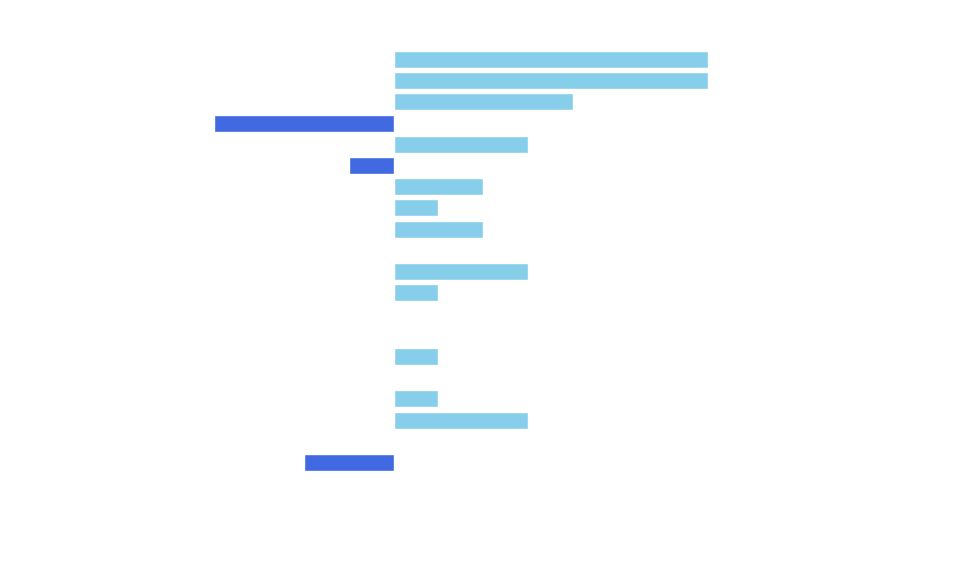

In [353]:
#Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(positive_features, positive_importances, color='skyblue', label="Positive Importance")
plt.barh(negative_features, negative_importances, color='royalblue', label="Negative Importance")
plt.xlabel("Importance (Drop in Accuracy)")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance for KNN")

# Set custom x-axis limits
plt.xlim(-0.02, 0.055)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Use feature names from DataFrame X as x-axis labels
plt.yticks(range(len(feature_names)), feature_names)

In [354]:
plt.savefig('model_2_importance_chart.png')

<Figure size 640x480 with 0 Axes>